<a href="https://colab.research.google.com/github/saravanankish/GRIP-tasks/blob/main/Task_5_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Author: SARAVANAN K**
**Computer Vision & Internet of Things**

Task 5: Traffic Sign Classification System

The Sparks Foundation Intern



# **Steps To load the Data set from kaggle to the notebook**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!kaggle datasets download -d flo2607/traffic-signs-classification

In [ ]:
from zipfile import ZipFile
file_name = 'gtsrb-german-traffic-sign.zip'

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

# **NEURAL NETWORK MODEL**



Importing necessary modules for the model creation.




In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

**Designing The Model**

The model Contains Input layer of CONV2D, Relu Activation, Batch Normalization and MaxPooling Layers. It is followed by two set of layers consisting of Conv2D, Relu Activation, Batchnormalization, Conv2D, Relu Activation,BatchNormalization and MaxPooling layers. Then it is followed by two set of fully connected layers. And finally a softmax output activation Function

In [2]:
class TrafficSignNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        channel_dim = -1
        model.add(Conv2D(8, (5, 5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(BatchNormalization(axis=channel_dim))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(16, (3, 3), padding="same"))
        model.add(Activation('relu'))
        model.add(BatchNormalization(axis=channel_dim))
        model.add(Conv2D(16, (3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization(axis=channel_dim))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation('relu'))
        model.add(BatchNormalization(axis=channel_dim))
        model.add(Conv2D(32, (3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization(axis=channel_dim))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model

Importing necessary modules for the train the model.

In [3]:
import matplotlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from skimage import transform
from skimage import exposure
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import os
matplotlib.use('Agg')

**Defining function to load the data**

In the function the data is also preprocessed as our dataset contains images of less contrast. And the image classId and path are returned by this function

In [4]:
def load_split(basePath, csvPath):
    data = []
    labels = []

    rows = open(csvPath).read().strip().split('\n')[1:]
    random.shuffle(rows)

    for i, row in enumerate(rows):
        if i > 0 and i % 1000 == 0:
            print("[INFO] processed {} images".format(i))

        label, imagePath = row.strip().split(',')[-2:]

        imagePath = os.path.sep.join([basePath, imagePath])
        image = io.imread(imagePath)
        image = transform.resize(image, (32, 32))
        image = exposure.equalize_adapthist(image, clip_limit=0.1)

        data.append(image)
        labels.append(label)

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

**Processing and Loading the Test and Train data.**

The data is processed and loaded using the above defined function

 **Using data augmentation.**

 Data Augmentation is used to reduce bias

In [5]:
NUM_EPOCHS = 30
INIT_LR = 1e-3
BATCH_SIZE = 64

labelNames = open("labels.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]
trainPath = '/content/data_set/Train.csv'
testPath = '/content/data_set/Test.csv'

print("[INFO] loading training data...")
(trainX, trainY) = load_split('/content/data_set', trainPath)
print("[INFO] loading test data...")
(testX, testY) = load_split('/content/data_set', testPath)

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

numLabels = len(np.unique(trainY))
trainY = to_categorical(trainY, numLabels)
testY = to_categorical(testY, numLabels)

classTotals = trainY.sum(axis=0)
classWeight = classTotals.max() / classTotals

aug = ImageDataGenerator(rotation_range=10, zoom_range=0.15, width_shift_range=0.1, height_shift_range=0.1,
                         shear_range=0.15, horizontal_flip=False,
                         vertical_flip=False,
                         fill_mode="nearest")

[INFO] loading training data...
[INFO] processed 1000 images
[INFO] processed 2000 images
[INFO] processed 3000 images
[INFO] processed 4000 images
[INFO] processed 5000 images
[INFO] processed 6000 images
[INFO] processed 7000 images
[INFO] processed 8000 images
[INFO] processed 9000 images
[INFO] processed 10000 images
[INFO] processed 11000 images
[INFO] processed 12000 images
[INFO] processed 13000 images
[INFO] processed 14000 images
[INFO] processed 15000 images
[INFO] processed 16000 images
[INFO] processed 17000 images
[INFO] processed 18000 images
[INFO] processed 19000 images
[INFO] processed 20000 images
[INFO] processed 21000 images
[INFO] processed 22000 images
[INFO] processed 23000 images
[INFO] processed 24000 images
[INFO] processed 25000 images
[INFO] processed 26000 images
[INFO] processed 27000 images
[INFO] processed 28000 images
[INFO] processed 29000 images
[INFO] processed 30000 images
[INFO] processed 31000 images
[INFO] processed 32000 images
[INFO] processed 

Compiling, Training, Evaluating and Visualizing the model the model

In [6]:
# initialize the optimizer and compile the model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / (NUM_EPOCHS * 0.5))
model = TrafficSignNet.build(width=32, height=32, depth=3, classes=numLabels)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


Training the Model we built earlier with our dataset

In [7]:
# train the network
print("[INFO] training network...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BATCH_SIZE), 
                        validation_data=(testX, testY), 
                        steps_per_epoch=trainX.shape[0] // BATCH_SIZE, 
                        epochs=NUM_EPOCHS,
                        verbose=1)

[INFO] training network...
Epoch 1/30
612/612 [==============================] - 86s 141ms/step - loss: 2.7511 - accuracy: 0.2699 - val_loss: 3.0797 - val_accuracy: 0.1802
Epoch 2/30
612/612 [==============================] - 86s 140ms/step - loss: 1.4969 - accuracy: 0.5145 - val_loss: 1.0231 - val_accuracy: 0.6480
Epoch 3/30
612/612 [==============================] - 89s 145ms/step - loss: 1.0580 - accuracy: 0.6514 - val_loss: 0.6618 - val_accuracy: 0.7789
Epoch 4/30
612/612 [==============================] - 88s 144ms/step - loss: 0.7847 - accuracy: 0.7404 - val_loss: 0.7003 - val_accuracy: 0.7667
Epoch 5/30
612/612 [==============================] - 87s 143ms/step - loss: 0.6060 - accuracy: 0.8049 - val_loss: 0.4730 - val_accuracy: 0.8477
Epoch 6/30
612/612 [==============================] - 88s 143ms/step - loss: 0.4883 - accuracy: 0.8426 - val_loss: 0.5664 - val_accuracy: 0.8207
Epoch 7/30
612/612 [==============================] - 88s 144ms/step - loss: 0.4119 - accuracy: 0.8674 

Evaluation the model we trained

In [8]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames, zero_division=1))

[INFO] evaluating network...
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.93      0.93      0.93        60
                              Speed limit (30km/h)       0.92      0.97      0.95       720
                              Speed limit (50km/h)       0.92      0.98      0.95       750
                              Speed limit (60km/h)       0.98      0.89      0.93       450
                              Speed limit (70km/h)       0.98      0.95      0.96       660
                              Speed limit (80km/h)       0.92      0.95      0.94       630
                       End of speed limit (80km/h)       0.97      0.95      0.96       150
                             Speed limit (100km/h)       0.93      0.96      0.95       450
                             Speed limit (120km/h)       1.00      0.86      0.93       450
                                        No passing

Storing The trained model and visualizing the training loss and accuracy using matplotlib

In [9]:
# save the network to disk
print("[INFO] serializing network to '{}'...".format('/content/output'))
model.save('/content/output')

N = np.arange(0, NUM_EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig('/content/output/plot.png')

[INFO] serializing network to '/content/output'...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/output/assets


Importing neessary modules for predicting images using our trained model

In [10]:
from tensorflow.keras.models import load_model
from skimage import transform
from skimage import exposure
from skimage import io
from imutils import paths
import numpy as np
import imutils
import random
from google.colab.patches import cv2_imshow
import cv2
import os

Loading the saved model and using it to predict 25 randomly choosen images in Test directory. The images are predicted and their corresponding labels are added to the same image and stored for future reference

[INFO] loading model...
[INFO] predicting...


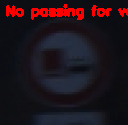

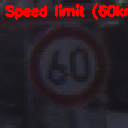

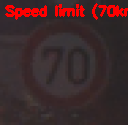

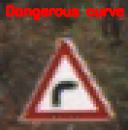

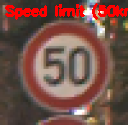

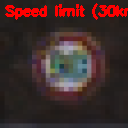

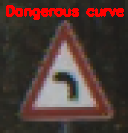

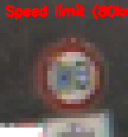

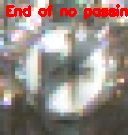

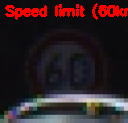

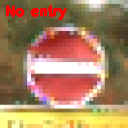

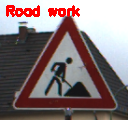

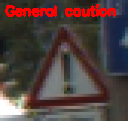

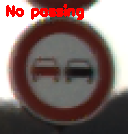

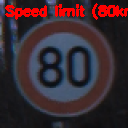

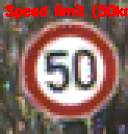

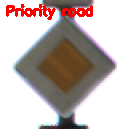

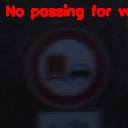

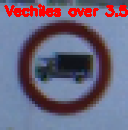

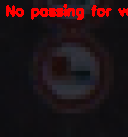

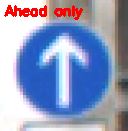

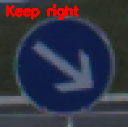

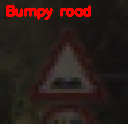

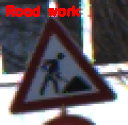

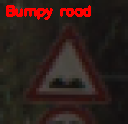

In [11]:
print("[INFO] loading model...")
model = load_model('/content/output')

labelNames = open("labels.csv").read().strip().split("\n")[1:]
labelNames = [l.split(",")[1] for l in labelNames]

print("[INFO] predicting...")
imagePaths = list(paths.list_images('/content/data_set/Test'))
random.shuffle(imagePaths)
imagePaths = imagePaths[:25]

for (i, imagePath) in enumerate(imagePaths):
    image = io.imread(imagePath)
    image = transform.resize(image, (32, 32))
    image = exposure.equalize_adapthist(image, clip_limit=0.1)

    image = image.astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)

    preds = model.predict(image)
    j = preds.argmax(axis=1)[0]
    label = labelNames[j]

    image = cv2.imread(imagePath)
    image = imutils.resize(image, width=128)
    cv2.putText(image, label, (5, 15), cv2.FONT_HERSHEY_SIMPLEX,
                0.45, (0, 0, 255), 2)
    cv2_imshow(image)
    p = '/content/examples/' + "{}.png".format(i)
    cv2.imwrite(p, image)